In [1]:
# libraries and setup
import pandas as pd
import numpy as np
import json
import datetime, pytz
datetime.datetime(1990, 1, 1, tzinfo=pytz.utc)


%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [25, 15]
plt.rcParams['font.size'] = 20

# list of dicts to get turned into a DataFrame
df_tmp = []

#####
# we need to load netdict

def readfile(fin="/Users/quinnbatten/Documents/Programming/PyProjects/rborrow/main1.json"):
    ''' Generic JSON reader, defaults to calling the file that getdata() outputs
    '''

    with open(fin) as f:
        vals = json.load(f)
    return vals

def getgraphinmem():
    '''Helper that reads our netdict file (the data translated into a useful dictionary thingie.)
    '''
    netdict = readfile("/Users/quinnbatten/Documents/Programming/PyProjects/rborrow/textfiles/netdict1.json")

    return netdict

netdict = getgraphinmem()

In [2]:
# Pop em into df_tmp
for loan in netdict:
    tmp_loan = {'amt':'', 'bor':'','date':'','lend':''}
    if loan['amt'].isdigit():
        tmp_loan['amt'] = int(loan['amt'])
    else:
        tmp_loan['amt'] = 'NaN'
    tmp_loan['bor'] = loan['bor']
    tmp_loan['lend'] = loan['lend']
    tmp_loan['date'] = loan['date']
    tmp_loan['date_h'] = datetime.datetime.utcfromtimestamp(loan['date']).strftime('%Y-%m-%d %H:%M:%S')
    df_tmp.append(tmp_loan)
    
df = pd.DataFrame(df_tmp)
df.replace('NaN', np.nan, inplace=True)
df = df[df.amt != 0]
df = df[~df.amt.isnull()]

plt.rcParams["figure.figsize"] = [25, 15]
plt.rcParams['font.size'] = 20

In [3]:
df_time = df[['amt','date','date_h']]
pd.to_datetime(df_time['date_h'])
df_time.set_index(df_time['date_h'], inplace=True)

In [4]:
# plt.scatter(df_time['date_h'],df_time['amt'], s=5 )

(array([5.054e+03, 2.817e+03, 1.202e+03, 5.480e+02, 1.970e+02, 2.190e+02,
        5.400e+01, 4.500e+01, 4.800e+01, 2.200e+01, 9.000e+00, 4.100e+01,
        8.000e+00, 6.000e+00, 1.400e+01, 4.000e+00, 0.000e+00, 1.400e+01,
        2.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([1.00000e+00, 1.77350e+02, 3.53700e+02, 5.30050e+02, 7.06400e+02,
        8.82750e+02, 1.05910e+03, 1.23545e+03, 1.41180e+03, 1.58815e+03,
        1.76450e+03, 1.94085e+03, 2.11720e+03, 2.29355e+03, 2.46990e+03,
        2.64625e+03, 2.82260e+03, 2.99895e+03, 3.17530e+03, 3.35165e+03,
        3.52800e+03, 3.70435e+03, 3.88070e+03, 4.05705e+03, 4.23340e+03,
        4.40975e+03, 4.58610e+03, 4.76245e+03, 4.93880e+03, 5.11515e+03,
        5.29150e+03, 5.46785e+03, 5.64420e+03, 5.82055e+03, 5.99

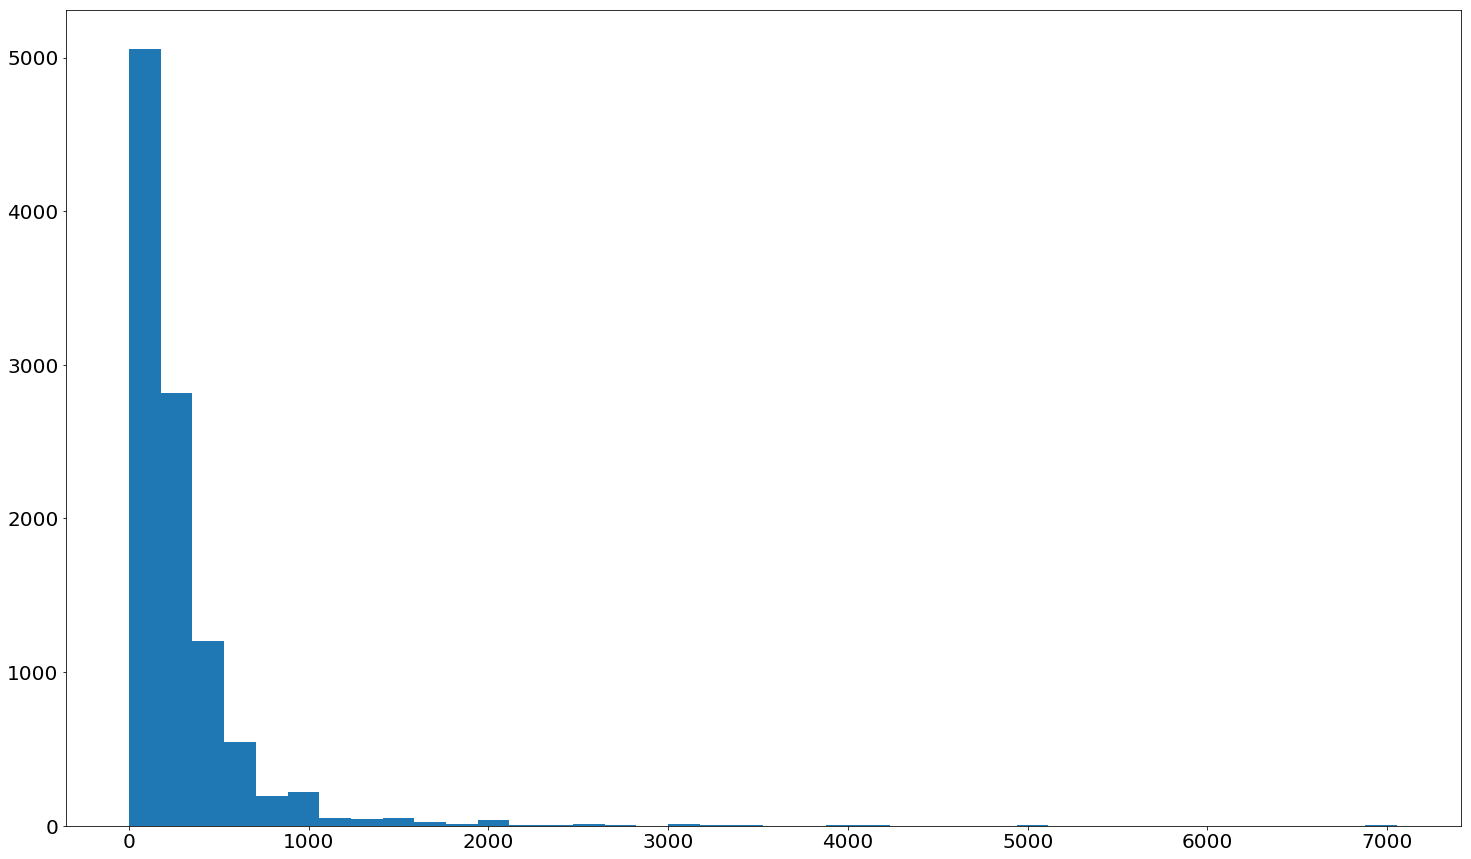

In [5]:
plt.hist(df['amt'], bins = 40)
#plt.title("Sum of lifetime loans (per Lender)", size = 30)

In [6]:
tmp2 = df.aggregate(np.sum)
tmp2

amt                                             2.91109e+06
bor       bannon031akavinceblacksiemprebreadthevomitgirl...
date                                         15484090266369
date_h    2018-08-28 13:22:252018-08-28 00:46:362018-08-...
lend      thefirm17982kashifrflagsflyWexleySnoopsJustadd...
dtype: object

### Let's look at our lenders...

In [7]:
df_lendgroup = df.groupby('lend')

lsum = df_lendgroup.aggregate(np.sum)['amt']
lcount = df_lendgroup.agg(pd.Series.nunique)['amt']
lcount.describe()

count    611.000000
mean       6.887070
std       13.665513
min        1.000000
25%        1.000000
50%        2.000000
75%        6.000000
max      139.000000
Name: amt, dtype: float64

In [8]:
lsum.describe()

count       611.000000
mean       4764.474632
std       21613.218560
min           1.000000
25%          90.000000
50%         305.000000
75%        1307.500000
max      306053.000000
Name: amt, dtype: float64

In [9]:
tmp = lsum.aggregate(np.sum)
tmp

2911094.0

Text(0.5,1,'Sum of lifetime loans (per Lender)')

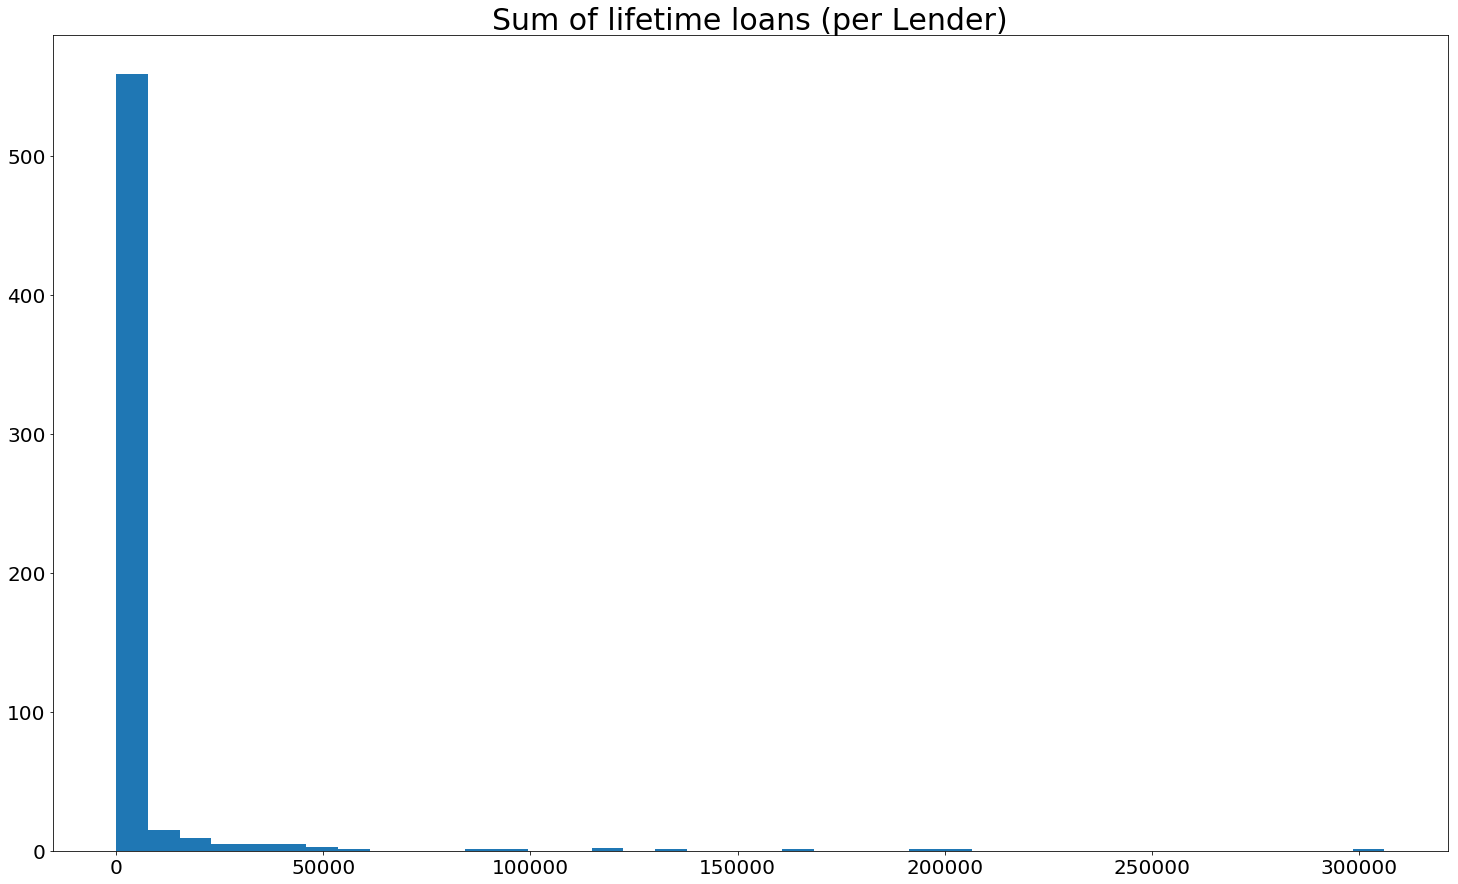

In [10]:
plt.hist(lsum, bins = 40)
plt.title("Sum of lifetime loans (per Lender)", size = 30)

Text(0.5,1,'Sum of lifetime loans (per lender), Log Scale')

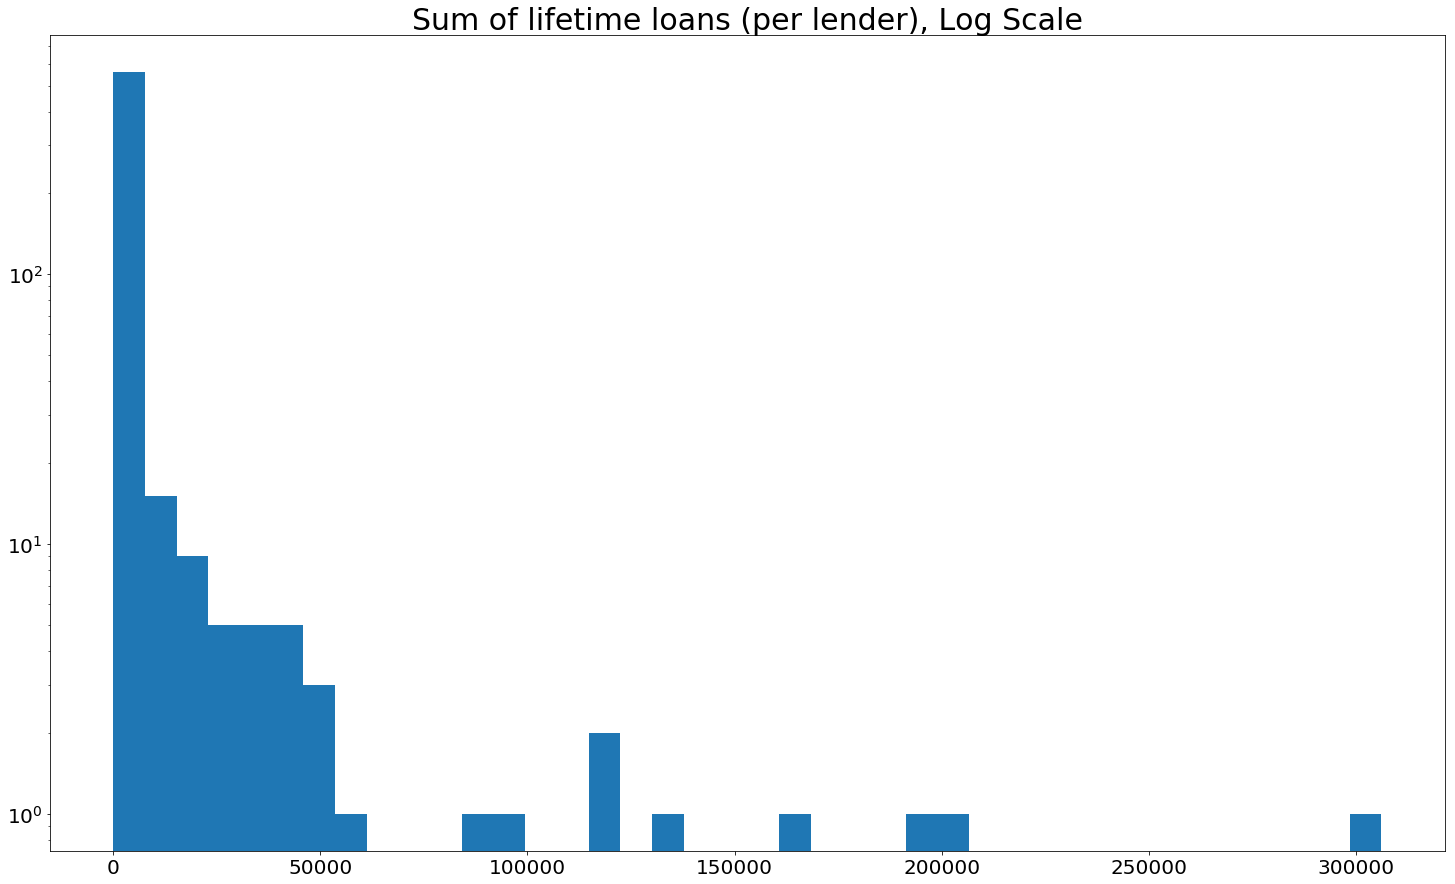

In [11]:
plt.hist(lsum, bins = 40, log = True)
plt.title("Sum of lifetime loans (per lender), Log Scale", size = 30)

Text(0.5,1,'Sum of lifetime loans, per lender, for those <$1000')

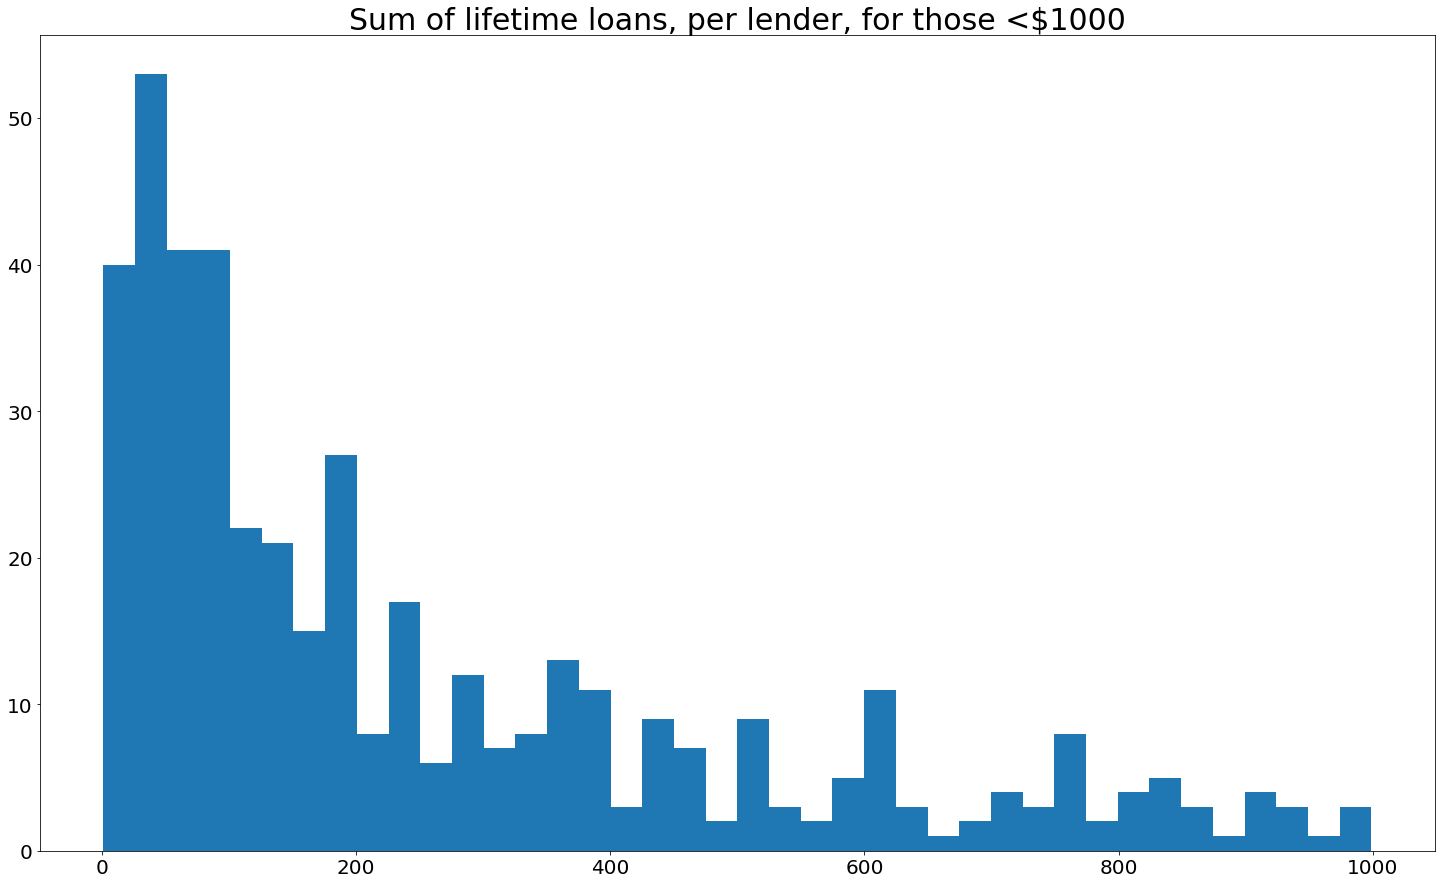

In [12]:
plt.hist(lsum[lsum < 1000], bins = 40)
plt.title("Sum of lifetime loans, per lender, for those <$1000", size = 30)

Note: leftmost bar is 0 to <25

Text(0.5,1,'Sum of lifetime loans, per lender, for those >$8000')

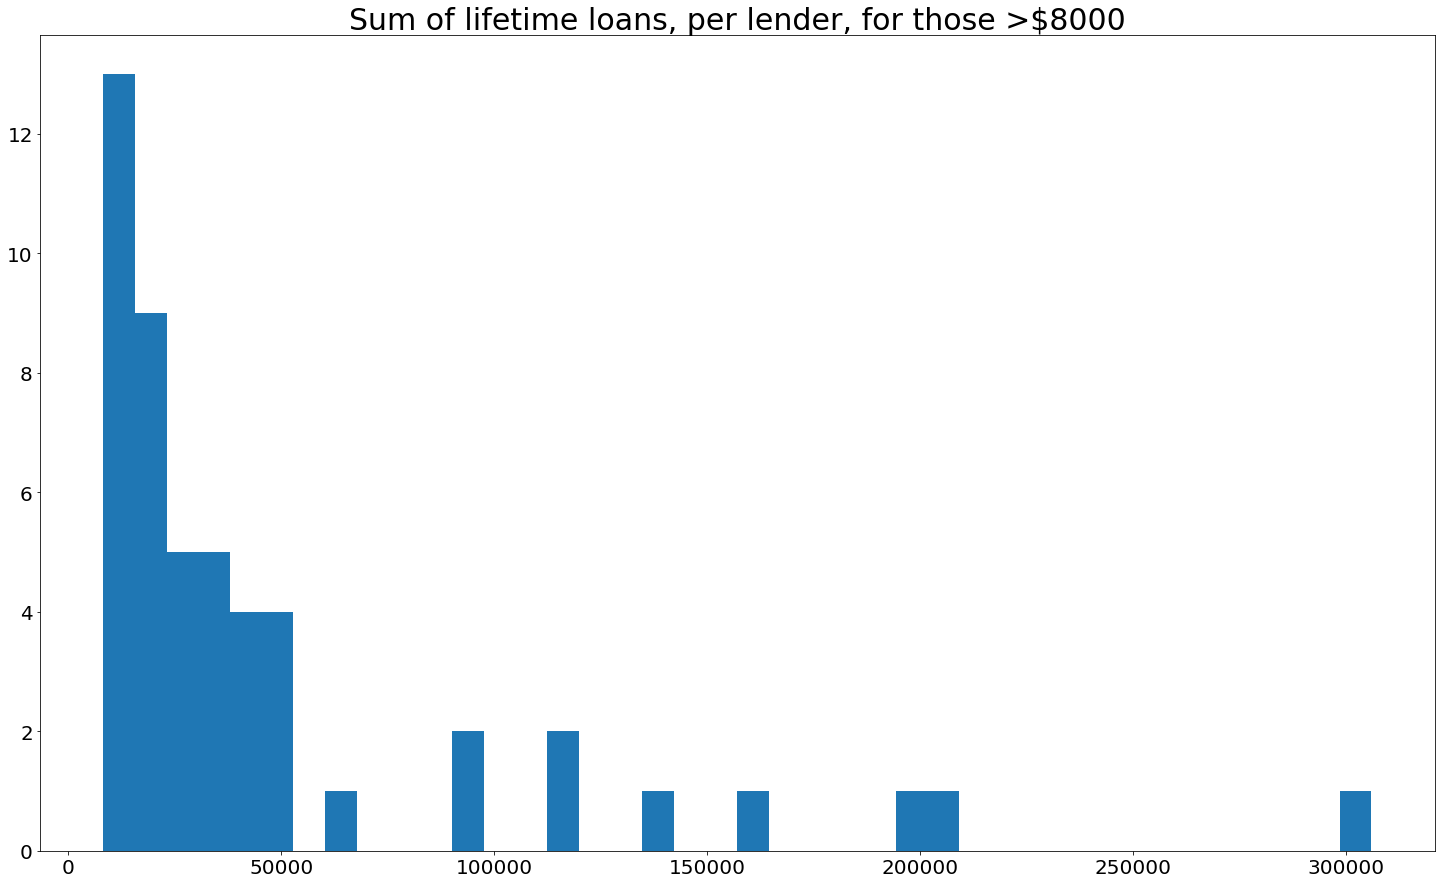

In [13]:
plt.hist(lsum[lsum > 8000], bins = 40)
plt.title("Sum of lifetime loans, per lender, for those >$8000", size = 30)

####There are 11 people who have lent over $50,000 each

###The largest loan given on the sub was $7000, the lender earned back $10,000

https://www.reddit.com/r/borrow/comments/8p0cgz/paid_umusic_tech_7000_on_time/

(Request: https://www.reddit.com/r/borrow/comments/7qqf7z/req_7000_columbia_md_usa_10010_by_060818_paypal/)

In [14]:
group_bor = df.groupby('bor')

bsum = group_bor.aggregate(np.sum)
bcount = group_bor.agg(pd.Series.nunique)

In [15]:
bsum.describe()

,amt,date
count,3370.000000,3.370000e+03
mean,863.826113,4.594686e+09
std,1709.610384,5.674636e+09
min,1.000000,1.411160e+09
25%,117.500000,1.506994e+09
50%,300.000000,2.917491e+09
75%,830.000000,4.598003e+09
max,32720.000000,6.931322e+10


In [16]:
bcount.describe()

,amt,date,date_h,lend
count,3370.000000,3370.000000,3370.000000,3370.000000
mean,2.532641,3.062018,3.062018,1.839169
std,2.590649,3.784176,3.784176,1.592207
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,2.000000,1.000000
75%,3.000000,3.000000,3.000000,2.000000
max,24.000000,46.000000,46.000000,17.000000


In [17]:
#plt.hist(bsum, bins = 40)
#plt.title("Sum of lifetime loans, per lender, for those >$8000", size = 30)

In [18]:
bfindbig = group_bor[['bor','amt']].aggregate(np.sum)
bfindbig[bfindbig['amt']>1000].sort_values(['amt'])

,amt
bor,
WolfInStep,1015.0
Mikey_Tuna,1015.0
ihsv12,1025.0
Galen47,1030.0
BretFart,1030.0
chrastini,1030.0
lukatraa,1035.0
mxKittyCat,1035.0
pushkoshkin,1040.0


In [19]:
lfindbig = df_lendgroup[['bor','amt']].aggregate(np.sum)
lfindbig[lfindbig['amt']>100000].sort_values(['amt'])

,amt
lend,
saintsintosea,116423.0
kashifr,118677.0
FoxK56,135077.0
IgrewAtomato,164562.0
l80sman104,196059.0
_cup_,201837.0
hedgie1,306053.0
